In [8]:
import numpy as np
import matplotlib.pyplot as plt

class dual:
    def __init__(self, f,d):
        self.f = f
        self.d = d
    def __add__(self, other):
        return dual(self.f + other.f, self.d + other.d)
    def __sub__(self, other):
        return dual(self.f - other.f, self.d - other.d)
    def __neg__(self):
        return dual(-self.f, -self.d)
    def __mul__(self, other):
        return dual(self.f * other.f, self.f * other.d + self.d * other.f)
    def __truediv__(self, other):
        return dual(self.f / other.f, (self.d * other.f - self.f * other.d)/other.f**2)
    def __pow__(self, num):
        return dual(self.f**num, num*self.f**(num-1)*self.d)
    def sin(self):
        return dual(np.sin(self.f), np.cos(self.f)*self.d)
    def cos(self):
        return dual(np.cos(self.f), -np.sin(self.f)*self.d)
    def exp(self):
        return dual(np.exp(self.f), np.exp(self.f)*self.d)
    def log(self):
        return dual(np.log(self.f), self.d/self.f)
    def sqrt(self):
        return dual(np.sqrt(self.f), 1/2/np.sqrt(self.f) * self.d)
    def print(self):
        return [self.f, self.d]
    def plot( f, xmin, xmax):
        x = np.linspace(xmin,xmax,100)
        xfd = [dual(v,1) for v in x]
        yf = [f(v).f for v in xfd]; yd = [f(v).d for v in xfd]
        plt.plot(x, yf, label="f"); plt.plot(x, yd, label="d")
        plt.grid(); plt.legend(); plt.show()
        
sin = lambda x: x.sin(); cos = lambda x: x.cos()
exp = lambda x: x.exp(); log = lambda x: x.log()
sqrt = lambda x: x.sqrt()

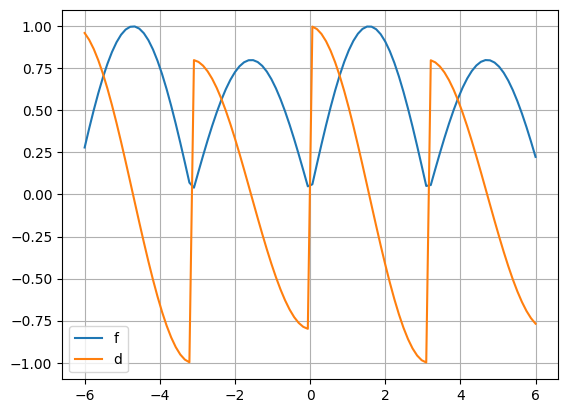

In [12]:
def f(x):
    if sin(x).f>0:
        return sin(x)
    else:
        return -sin(x)*dual(0.8,0)
dual.plot(f,-6,6)

In [4]:
# 1-d gradient descent
x = dual(1.0, 1)
gamma = 0.1
x0 = dual(1.0e99, 1)
i = 0
while abs(x.f - x0.f) > 1.0e-9:
    x0 = x
    x = x0 - dual(f(x0).d *gamma, 0)
    i += 1
    if i%10 == 0:
        print("[ i=", i, "] ", x.f)
print("[ i=", i, "] ", x.f)

[ i= 10 ]  1.089712138813217
[ i= 20 ]  1.106614673369419
[ i= 30 ]  1.1100921446295484
[ i= 40 ]  1.1108226326114037
[ i= 50 ]  1.110976766343348
[ i= 60 ]  1.111009319425905
[ i= 70 ]  1.1110161960163978
[ i= 80 ]  1.1110176487049213
[ i= 90 ]  1.1110179555899589
[ i= 100 ]  1.1110180204205142
[ i= 107 ]  1.1110180319363567


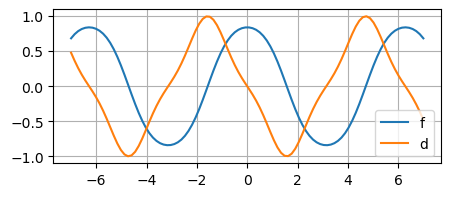

4.71238898038469


In [11]:
# Newton's method for finding zeros
def y(x):
    return sin(cos(x))

dual.plot(y, -7,7)

x = 4
x0 = 1.0e99
while abs(x-x0) > 1.0e-9:
    ydual = y(dual(x,1))
    x0 = x
    x = x - ydual.f/ydual.d
print(x)

[1, 0.6666666666666667]


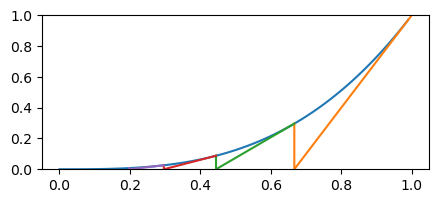

In [6]:
def y(x):
    return x**3

n=3
xp = np.arange(0,1,0.01)
plt.plot(xp, xp**n)
x0 = [1]
for i in range(1,5):
    x0.append(x0[i-1] - x0[i-1]/n)
print(x0[0:2])
plt.plot([x0[0], x0[1], x0[1]], [x0[0]**n, 0, x0[1]**n])
plt.plot([x0[1], x0[2], x0[2]], [x0[1]**n, 0, x0[2]**n])
plt.plot([x0[2], x0[3], x0[3]], [x0[2]**n, 0, x0[3]**n])
plt.plot([x0[3], x0[4], x0[4]], [x0[3]**n, 0, x0[4]**n])
plt.ylim(0,1)
plt.show()

In [7]:
# Related rates
def height(t):
    a = dual(np.pi/3*(1/2)**2, 0)
    v = dual(1,0) - exp(-t)
    return (v/a)**(1/3)

for time in range(1,30):
    print(height(dual(time,1)).print())

[1.3415610154462234, 0.2602524206112209]
[1.489222892664916, 0.07769655222958367]
[1.5368002999727695, 0.026840574028348108]
[1.5535828387432915, 0.00966191829246955]
[1.5596664820235653, 0.003526746394325806]
[1.5618926319754092, 0.0012937217359784547]
[1.5627099922714172, 0.0004754358945327159]
[1.5630104672962641, 0.00017483585049330396]
[1.5631209768182428, 6.430942091734251e-05]
[1.5631616270681787, 2.3656883379612778e-05]
[1.5631765809274654, 8.702714529124047e-06]
[1.563182082072877, 3.2015272239209462e-06]
[1.563184105821435, 1.1777729964594631e-06]
[1.5631848503156052, 4.332780590514953e-07]
[1.563185124199526, 1.593940343811949e-07]
[1.5631852249557656, 5.863778073513337e-08]
[1.5631852620219113, 2.157163298536412e-08]
[1.563185275657784, 7.935760149361823e-09]
[1.563185280674141, 2.9194029902807442e-09]
[1.5631852825195558, 1.073988338082929e-09]
[1.5631852831984459, 3.950982292954123e-10]
[1.5631852834481956, 1.453485157545781e-10]
[1.5631852835400735, 5.347073074460717e-11

S= [100.05807600940865, -0.5745855020409742]
H= [7.792472015742465, 0.00919665130152724]
P= [100.00924298872297, 0.2950764958920932]


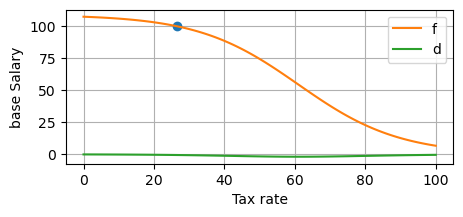

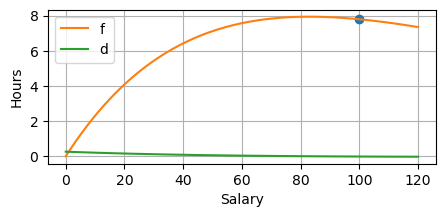

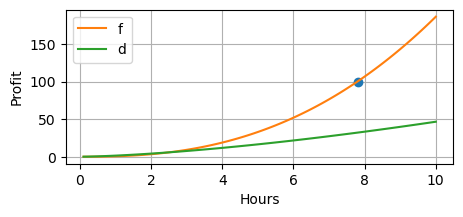

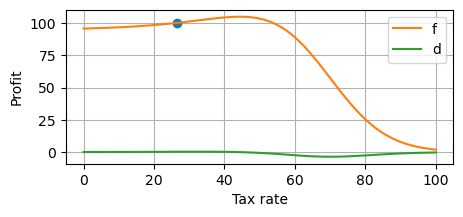

In [140]:
P = lambda h: dual(0.59,0)*h**2.5
H = lambda s: dual(0.26,0)*s*exp(-s/dual(83.0,0))
S = lambda t: dual(109,0)/(dual(1,0)+exp(dual(0.07,0)*(t-dual(61,0))))

T = dual(26.5,1)
print("S=", S(T).print())
print("H=", H(S(T)).print())
print("P=", P(H(S(T))).print())

plt.ylabel("base Salary");plt.xlabel("Tax rate"); 
plt.plot([26.5],[100], marker = 'o'); dual.plot(S,0,100)
plt.ylabel("Hours"); plt.xlabel("Salary"); 
plt.plot([100],[7.8], marker = 'o'); dual.plot(H,0, 120)
plt.ylabel("Profit"); plt.xlabel("Hours"); 
plt.plot([7.8],[100], marker = 'o'); dual.plot(P, 0.1, 10)
plt.ylabel("Profit"); plt.xlabel("Tax rate"); 
plt.plot([26.5],[100], marker = 'o'); dual.plot(lambda T:P(H(S(T))),0, 100)

[1.0655211322337126, -0.12701323243857365]


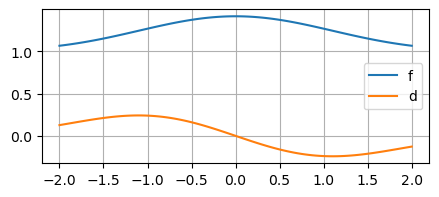

In [38]:
f = lambda x: sqrt( dual(1,0) + exp(-x**2/dual(2,0)) )
print(f(dual(2,1)).print())
dual.plot(f, -2,2)

In [44]:
#Exercise 7
x = dual(2,1)
w1 = x**2; print(w1.print())
w2 = dual(-1/2,0) * w1; print(w2.print())
w3 = exp(w2); print(w3.print())
w4 = dual(1,0) + w3; print(w3.print())
y = sqrt(w4); print(y.print())

[4, 4]
[-2.0, -2.0]
[0.1353352832366127, -0.2706705664732254]
[0.1353352832366127, -0.2706705664732254]
[1.0655211322337126, -0.12701323243857365]


In [49]:
0.5/np.sqrt(1.1353)*(-0.2707)

-0.12702901811661488

In [4]:
#multiply-nested function
def g(x,n):
    v = cos(x)
    for i in range(n-1):
        v = cos(v)
    return v
#print(g(np.pi, 1))

[0.7399877647958709, 0.01971165508115224]
[0.7071067811865476, -0.7071067811865476]


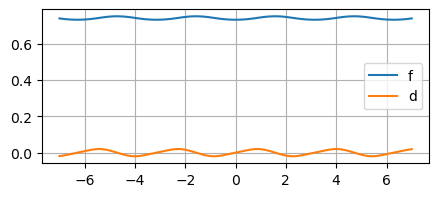

In [7]:
f = lambda x: g(x, 10)
a = dual(np.pi/4,1)
print(f(a).print())
print(cos(a).print())
dual.plot(f, -7, 7)

### def euler(q, dt):
    x0, y0, vx0, vy0 = q
    x = x0 + vx0*dt
    y = y0 + vy0*dt
    vx = vx0 - b*vx0 * dt
    vy = vy0 - (g + b*vy0)*dt
    return [x, y, vx, vy]

In [ ]:
def trajectory(target, theta):
    v0 = dual(9.8*math.sqrt(2),0)
    vx0 = theta.cos() * v0
    vy0 = theta.sin() * v0
    x0 = dual(0,0)
    y0 = dual(0,0)
    g = dual(9.8, 0)
    b = dual(0, 0)
    dt = dual(0.001, 0)
    q = [x0, y0, vx0, vy0]
    t=0
    while(q[1].print()[0] >= 0):
        #print("t = " + str(t))
        t+=dt.print()[0]
        #print (q[0].print()[0], q[1].print()[0])
        q = euler(q, dt)
#    print("t = " + str(t));
#    print ("(x,y) = ", "(", q[0].print()[0], ",", q[1].print()[0], ")")
    xe = q[0]
    f = (xe-target)**2
    return f

In [ ]:
target = dual(19.6, 0)
theta = dual(45 * pi/180, 1)
f = trajectory(target, theta).print()
print(f[0], "   ", f[1])

In [ ]:
target = dual(19.6, 0)
N = 20
for r in range(N):
    theta = dual(r/N * 85 * pi/180, 1)
    f = trajectory(target, theta)
    print(round(r/N * 85,1),"   ", f.f, "   ", f.d)

In [ ]:
theta.cos().print()

In [ ]:
for i in range(-10,10):
    x = dual(i*pi/4.0,1)
    f = x.sin()
    print(x.print()[0], "   ", f.print()[0], "     ", f.print()[1])

In [ ]:
dt = dual(0.002,0)
g = dual(9.8, 0)
v0 = dual(9.8*math.sqrt(2),0)
px = dual(0,0)
py = dual(0,0)
ptheta = dual(0,0)
for deg in range(35,55,1):
    theta = dual(deg * pi/180, 1)
    vx = theta.cos() * v0
    vy = theta.sin() * v0
    x = dual(0,0)
    y = dual(0,0)
    t = dual(0,0)
    while(vy.f > 0):
        t = t+dt
        x = x + vx*dt
        y = y + vy*dt
        vx = vx
        vy = vy - g*dt
        #print(y.f)
    print(round(theta.f,3), "x.f=", round(x.f,4), "x.d_num=", round((x.f-px.f)/(theta.f-ptheta.f),2), "x.d=", round(x.d,4), 
          "x.d_th=", round((v0**2/g*(dual(2,0)*theta).cos()).f,2), "    ", 
          "y.f=",round(y.f,4), "y.d_num=", round((y.f-py.f)/(theta.f-ptheta.f),4) ,"y.d=",round(y.d,4),"  ", (vx*t).f, (vx*t).d)
    px = x
    py = y
    ptheta = theta

In [ ]:
v0.print()